In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

adult_params = {
    "alpha": [1.0],
    "gamma": list(np.linspace(0.03, 0.04, 20)),
    "r": [1.5],
    "nu": [0.04],
    "lambda_max": [10.0],
}

In [3]:
from ferm_ge.utils import get_params_combination

pd.DataFrame(get_params_combination(adult_params))
# wrapping with pd.DataFrame just for tabular display

,alpha,gamma,r,nu,lambda_max
0,1.0,0.030000,1.5,0.04,10.0
1,1.0,0.030526,1.5,0.04,10.0
2,1.0,0.031053,1.5,0.04,10.0
3,1.0,0.031579,1.5,0.04,10.0
4,1.0,0.032105,1.5,0.04,10.0
5,1.0,0.032632,1.5,0.04,10.0
6,1.0,0.033158,1.5,0.04,10.0
7,1.0,0.033684,1.5,0.04,10.0
8,1.0,0.034211,1.5,0.04,10.0
9,1.0,0.034737,1.5,0.04,10.0


In [4]:
from ferm_ge import Experiment
from data.adult import Adult

preset = Adult()

adult_exp = Experiment(preset.applicable_task)

adult_exp.task.train(*preset.get_train_data())
adult_exp.task.test(*preset.get_test_data())

adult_results = adult_exp.solve(adult_params)

/home/wldh/.cache/pypoetry/virtualenvs/ferm-ge-d03ARtr4-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
0020/0020 Solving a fairness problem: 100%|██████████| 11615426/11615426 [28:53<00:00, 6700.40it/s]


In [5]:
adult_metrics = adult_exp.get_metrics_with_prob(adult_results)

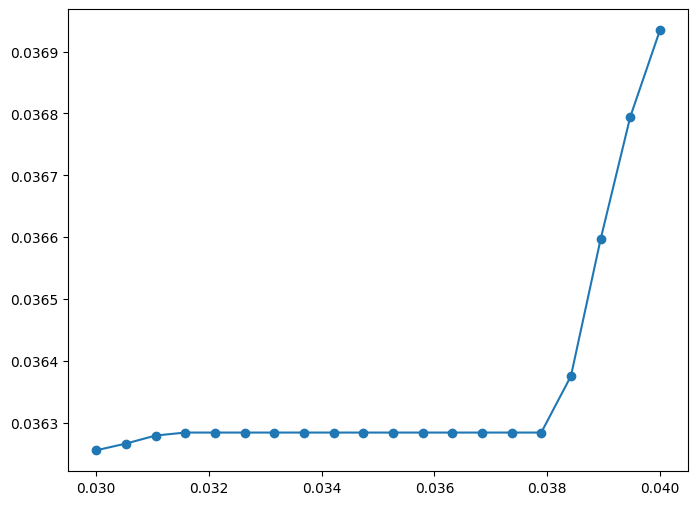

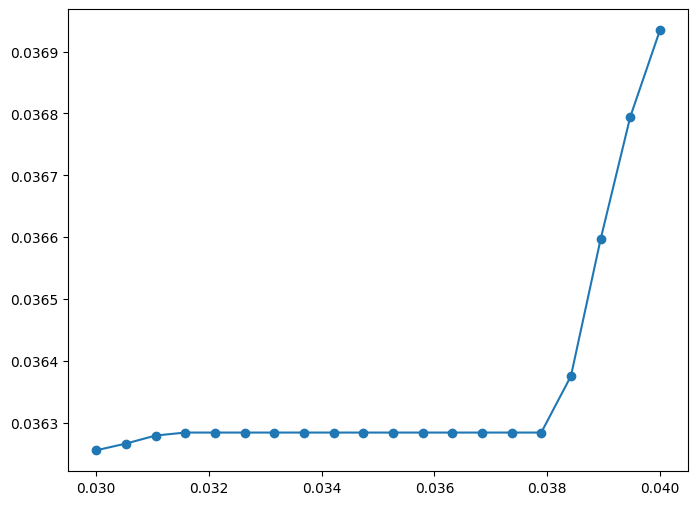

In [6]:
adult_exp.plot_metrics(adult_metrics, "I_alpha")

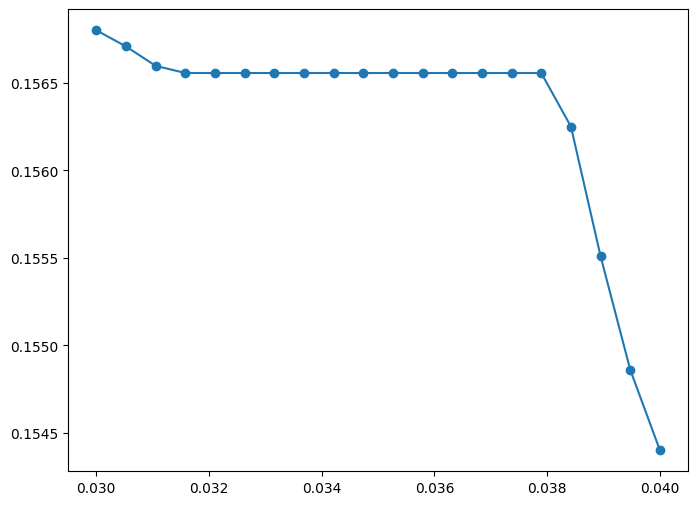

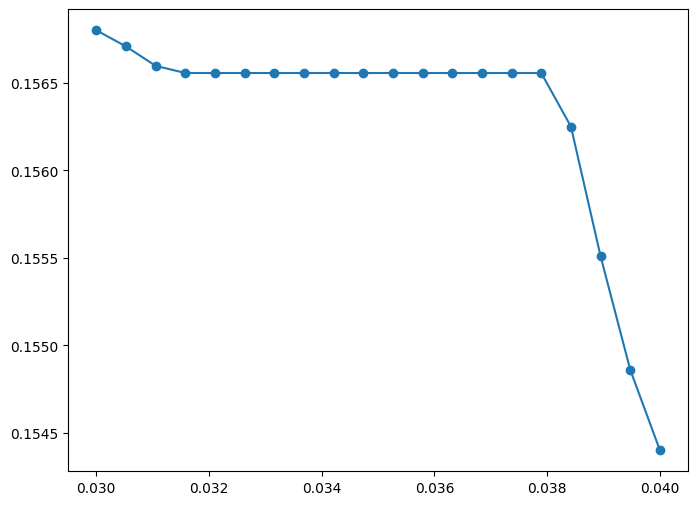

In [7]:
adult_exp.plot_metrics(adult_metrics, "err")

In [ ]:
adult_metrics_rep = adult_exp.get_metrics_with_repeat(adult_results)

In [ ]:
adult_exp.plot_metrics(adult_metrics_rep, "I_alpha")

In [ ]:
adult_exp.plot_metrics(adult_metrics_rep, "err")